# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [78]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/servontius/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [79]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv()

news_api_key = os.getenv('NEWS_API')

In [80]:
# Create a newsapi client
# YOUR CODE HERE!
news_api_client = NewsApiClient(api_key=news_api_key)

In [81]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
bitcoin_articles = news_api_client.get_everything(
    q='bitcoin',
    language='en'
)
bitcoin_articles['totalResults']

7861

In [82]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ethereum_articles = news_api_client.get_everything(
    q='ethereum',
    language='en'
)
ethereum_articles['totalResults']

3319

In [83]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
bitcoin_sentiment = []

for article in bitcoin_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]

        bitcoin_sentiment.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu

        })

    except AttributeError:
        pass

btc_df = pd.DataFrame(bitcoin_sentiment)
btc_df

,text,date,compound,positive,negative,neutral
0,The plant opening northeast of Niagara Falls t...,2021-12-06,0.0000,0.000,0.000,1.000
1,"Earlier this year, Nothing released a pair of ...",2021-12-01,0.5106,0.099,0.000,0.901
2,"MIZATA, El Salvador/LONDON, Nov 22 (Reuters) -...",2021-11-22,0.0000,0.000,0.000,1.000
3,"In keeping with a previous announcement, AMC t...",2021-11-12,0.5719,0.153,0.000,0.847
4,Posted \r\nAfter becoming the first country to...,2021-11-22,0.4767,0.136,0.000,0.864
5,"Available for the same price, $99, on December...",2021-12-01,0.1280,0.043,0.000,0.957
6,(Reuters) - A computer scientist who has claim...,2021-12-06,0.0000,0.000,0.000,1.000
7,Spotify has removed the shuffle button from al...,2021-11-22,0.0000,0.000,0.000,1.000
8,Australian Baseball League club Perth Heat wil...,2021-11-17,-0.1027,0.000,0.043,0.957
9,"Dec 4 (Reuters) - Bitcoin dropped 8.4% to $49,...",2021-12-04,-0.3818,0.000,0.080,0.920


In [84]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
ethereum_sentiment = []

for article in ethereum_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]

        ethereum_sentiment.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu

        })

    except AttributeError:
        pass

eth_df = pd.DataFrame(ethereum_sentiment)
eth_df

,text,date,compound,positive,negative,neutral
0,"If you claim ownership, someone will probably ...",2021-11-19,0.7783,0.216,0.000,0.784
1,More than $1.2 million has already been spent ...,2021-11-24,0.0000,0.000,0.000,1.000
2,"In keeping with a previous announcement, AMC t...",2021-11-12,0.5719,0.153,0.000,0.847
3,Ethereum has been on a tear this year. Its out...,2021-11-23,0.6542,0.178,0.000,0.822
4,Blockchain startup MonoX Finance said on Wedne...,2021-12-02,-0.0516,0.074,0.079,0.847
5,"On Monday, Budweiser joined the non-fungible t...",2021-11-30,-0.1531,0.000,0.045,0.955
6,"Earlier this year, Nothing released a pair of ...",2021-12-01,0.5106,0.099,0.000,0.901
7,"Nicholas Merten , an expert in cryptography, p...",2021-12-10,0.4939,0.119,0.000,0.881
8,White Castle double cheeseburger.Erin McDowell...,2021-12-10,0.0000,0.000,0.000,1.000
9,Regal movie theater.Shutterstock\r\nMovie-thea...,2021-11-23,0.3818,0.080,0.000,0.920


In [85]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.099135,0.043900,0.016200,0.939900
std,0.305228,0.065594,0.029573,0.068112
min,-0.381800,0.000000,0.000000,0.791000
25%,0.000000,0.000000,0.000000,0.891750
50%,0.000000,0.000000,0.000000,0.957000
75%,0.463275,0.108250,0.010750,1.000000
max,0.571900,0.158000,0.080000,1.000000


In [86]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.00000,20.000000
mean,0.255490,0.086300,0.02620,0.887400
std,0.319765,0.070738,0.03871,0.079379
min,-0.318200,0.000000,0.00000,0.729000
25%,0.000000,0.032250,0.00000,0.831750
50%,0.248950,0.076500,0.00000,0.891000
75%,0.498075,0.127500,0.06200,0.945250
max,0.817600,0.221000,0.11500,1.000000


---

### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had the highest score at 0.072 (rounded) vs Bitcoin at 0.044.

Q: Which coin had the highest compound score?

A: Ethereum again had the highest score with a score of 0.81 (rounded) vs Bitcoin at 0.57

Q. Which coin had the highest positive score?

A: Ethereum had the highest score with 0.22 (rounded) vs Bitcoin at 0.15.

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [87]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [88]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!
stop_words = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!
btc_article = btc_df['text'][2]
btc_sentence = sent_tokenize(btc_article)[0]
btc_words = word_tokenize(btc_sentence)

result = []
for word in btc_words:
    if word.lower() not in stop_words:
        result.append(word.lower())


In [89]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""

    # Create a list of the words
    words = word_tokenize(text)

    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))

    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))

    # Remove the stopwords
    words = list(filter(lambda t: t.lower() not in stop_words, words))

    # Lemmatize Words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]

    return tokens

In [90]:
# Create a new tokens column for Bitcoin
btc_df["tokens"] = btc_df.text.apply(tokenizer)
btc_df.head()

,text,date,compound,positive,negative,neutral,tokens
0,The plant opening northeast of Niagara Falls t...,2021-12-06,0.0000,0.000,0.0,1.000,"[plant, opening, northeast, Niagara, Falls, mo..."
1,"Earlier this year, Nothing released a pair of ...",2021-12-01,0.5106,0.099,0.0,0.901,"[Earlier, year, Nothing, released, pair, relat..."
2,"MIZATA, El Salvador/LONDON, Nov 22 (Reuters) -...",2021-11-22,0.0000,0.000,0.0,1.000,"[MIZATA, El, Salvador/LONDON, Nov, 22, Reuters..."
3,"In keeping with a previous announcement, AMC t...",2021-11-12,0.5719,0.153,0.0,0.847,"[keeping, previous, announcement, AMC, theater..."
4,Posted \r\nAfter becoming the first country to...,2021-11-22,0.4767,0.136,0.0,0.864,"[Posted, becoming, first, country, accept, cry..."


In [91]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
eth_df["tokens"] = eth_df.text.apply(tokenizer)
eth_df.head()

,text,date,compound,positive,negative,neutral,tokens
0,"If you claim ownership, someone will probably ...",2021-11-19,0.7783,0.216,0.000,0.784,"[claim, ownership, someone, probably, want, ta..."
1,More than $1.2 million has already been spent ...,2021-11-24,0.0000,0.000,0.000,1.000,"[1.2, million, already, spent, gas, fee, One, ..."
2,"In keeping with a previous announcement, AMC t...",2021-11-12,0.5719,0.153,0.000,0.847,"[keeping, previous, announcement, AMC, theater..."
3,Ethereum has been on a tear this year. Its out...,2021-11-23,0.6542,0.178,0.000,0.822,"[Ethereum, tear, year, outperformed, bitcoin, ..."
4,Blockchain startup MonoX Finance said on Wedne...,2021-12-02,-0.0516,0.074,0.079,0.847,"[Blockchain, startup, MonoX, Finance, said, We..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [92]:
from collections import Counter
from nltk import ngrams

In [93]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
btc_gram_counts = Counter(ngrams(btc_df['tokens'][2], n=2))
btc_gram_counts

Counter({('MIZATA', 'El'): 1,
         ('El', 'Salvador/LONDON'): 1,
         ('Salvador/LONDON', 'Nov'): 1,
         ('Nov', '22'): 1,
         ('22', 'Reuters'): 1,
         ('Reuters', 'El'): 1,
         ('El', 'Salvador'): 1,
         ('Salvador', 'plan'): 1,
         ('plan', 'build'): 1,
         ('build', 'world'): 1,
         ('world', "'s"): 1,
         ("'s", 'first'): 1,
         ('first', '``'): 1,
         ('``', 'Bitcoin'): 1,
         ('Bitcoin', 'City'): 1,
         ('City', "''"): 1,
         ("''", 'money'): 1,
         ('money', '1'): 1,
         ('1', 'billion'): 1,
         ('billion', 'bitcoin-backed'): 1,
         ('bitcoin-backed', 'bond'): 1,
         ('bond', 'country'): 1,
         ('country', "'s"): 1,
         ("'s", 'President'): 1,
         ('President', 'Nayib'): 1,
         ('Nayib', 'Bukele'): 1,
         ('Bukele', 'said'): 1,
         ('said', 'o…'): 1,
         ('o…', '+3147'): 1,
         ('+3147', 'char'): 1})

In [94]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
eth_gram_counts = Counter(ngrams(eth_df['tokens'][2], n=2))
print(eth_gram_counts)

Counter({('keeping', 'previous'): 1, ('previous', 'announcement'): 1, ('announcement', 'AMC'): 1, ('AMC', 'theater'): 1, ('theater', 'accept'): 1, ('accept', 'cryptocurrencies'): 1, ('cryptocurrencies', 'payment'): 1, ('payment', 'online'): 1, ('online', 'purchase'): 1, ('purchase', 'Bitcoin'): 1, ('Bitcoin', 'Ethereum'): 1, ('Ethereum', 'Bitcoin'): 1, ('Bitcoin', 'Cash'): 1, ('Cash', 'Litecoin'): 1, ('Litecoin', 'accepted'): 1, ('accepted', 'Previously'): 1, ('Previously', 'compa…'): 1, ('compa…', '+1036'): 1, ('+1036', 'char'): 1})


In [95]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [96]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
print(btc_gram_counts.most_common(10))

[(('MIZATA', 'El'), 1), (('El', 'Salvador/LONDON'), 1), (('Salvador/LONDON', 'Nov'), 1), (('Nov', '22'), 1), (('22', 'Reuters'), 1), (('Reuters', 'El'), 1), (('El', 'Salvador'), 1), (('Salvador', 'plan'), 1), (('plan', 'build'), 1), (('build', 'world'), 1)]


In [97]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
print(eth_gram_counts.most_common(10))

[(('keeping', 'previous'), 1), (('previous', 'announcement'), 1), (('announcement', 'AMC'), 1), (('AMC', 'theater'), 1), (('theater', 'accept'), 1), (('accept', 'cryptocurrencies'), 1), (('cryptocurrencies', 'payment'), 1), (('payment', 'online'), 1), (('online', 'purchase'), 1), (('purchase', 'Bitcoin'), 1)]


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [152]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

def process_text(doc):
    #sw = set(stopwords.words('english'))
    regex = re.compile('[^a-zA-Z ]')
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in stop_words]
    return ' '.join(output)

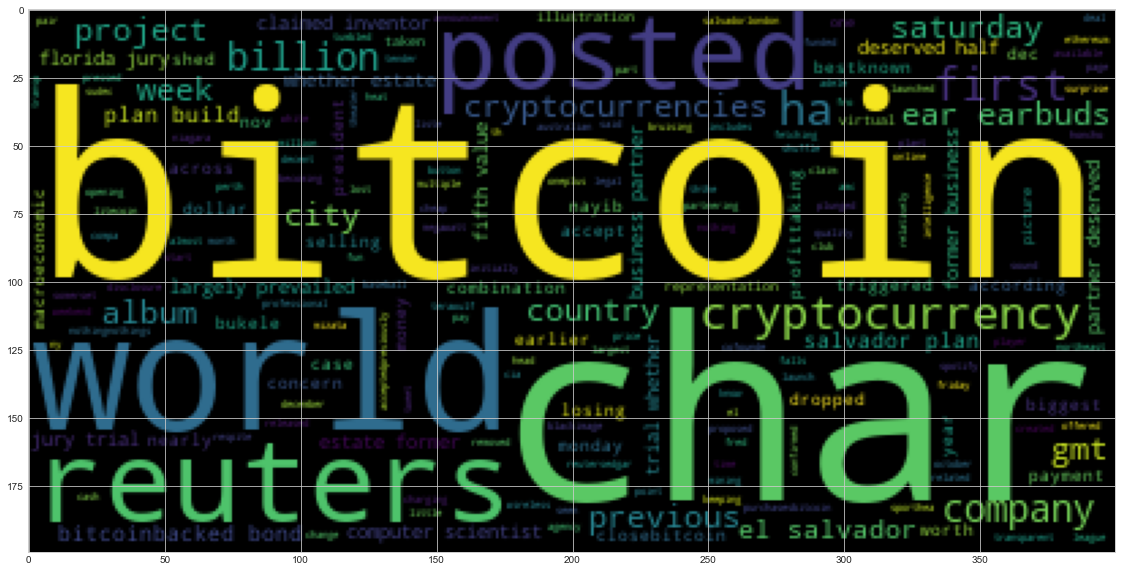

In [153]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
btc_corpus = []
for sentence in btc_df['text']:
    btc_corpus.append(sentence)

btc_big_string = ' '.join(btc_corpus)
btc_input_text = process_text(btc_big_string)

btc_word_cloud = WordCloud().generate(btc_input_text)
plt.imshow(btc_word_cloud)

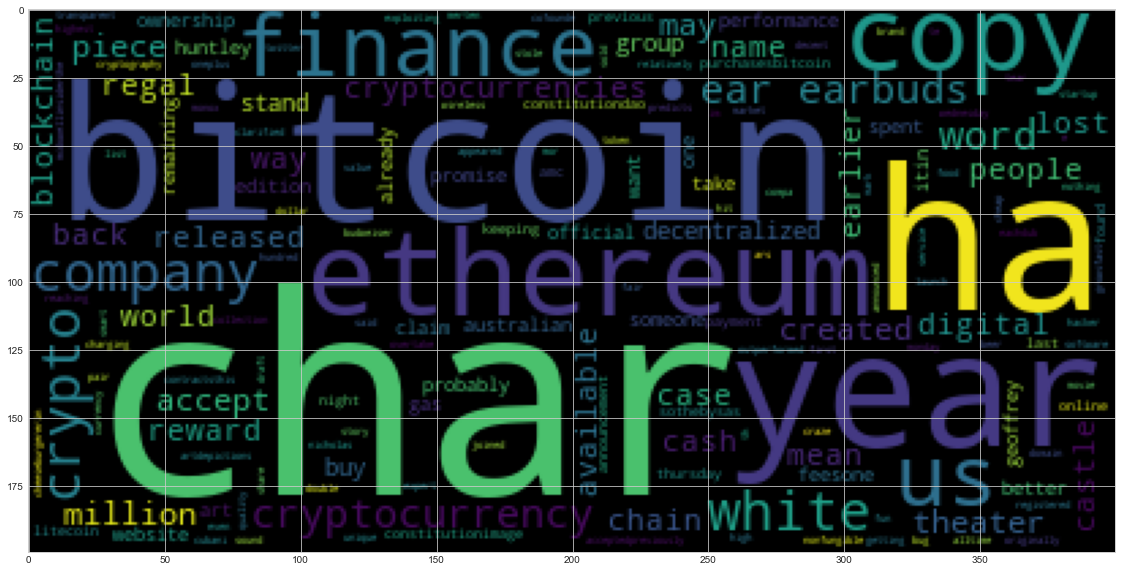

In [154]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
eth_corpus = []
for sentence in eth_df['text']:
	eth_corpus.append(sentence)

eth_big_string = ' '.join(eth_corpus)
eth_input_text = process_text(eth_big_string)

eth_word_cloud = WordCloud().generate(eth_input_text)
plt.imshow(eth_word_cloud)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [155]:
import spacy
from spacy import displacy

In [156]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.9 MB 1.7 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [157]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [158]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
all_btc_text = btc_df["text"].str.cat()
all_btc_text

'The plant opening northeast of Niagara Falls this month, in Somerset, N.Y., is part of a $550 million project by Terawulf, a Bitcoin mining company. The project also includes a proposed 150-megawatt … [+1514 chars]Earlier this year, Nothing released a pair of relatively cheap $99 Ear 1 earbuds with a fun transparent case, wireless charging and decent sound quality. Now, the company (created by OnePlus cofounde… [+1395 chars]MIZATA, El Salvador/LONDON, Nov 22 (Reuters) - El Salvador plans to build the world\'s first "Bitcoin City" with money from a $1 billion bitcoin-backed bond the country\'s President Nayib Bukele said o… [+3147 chars]In keeping with a previous announcement, AMC theaters now accept cryptocurrencies as payment for online purchases.\xa0\r\nBitcoin, Ethereum, Bitcoin Cash and Litecoin are accepted.\xa0\r\nPreviously, the compa… [+1036 chars]Posted \r\nAfter becoming the first country to accept the cryptocurrency as legal tender, El Salvador plans to build the world\'s f

In [168]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
ner_btc = nlp(all_btc_text)

# Add a title to the document
# YOUR CODE HERE


In [161]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(ner_btc, style='ent')

In [169]:
# List all Entities
# YOUR CODE HERE!
for ent in ner_btc.ents:
	print(ent.text, ent.label_)


Niagara Falls PERSON
this month DATE
Somerset GPE
N.Y. GPE
$550 million MONEY
Terawulf DATE
150-megawatt QUANTITY
this year DATE
99 MONEY
OnePlus ORG
El Salvador/ GPE
Reuters ORG
El Salvador GPE
first ORDINAL
Bitcoin City GPE
$1 billion MONEY
Nayib Bukele PERSON
AMC ORG
first ORDINAL
El Salvador GPE
Bitcoin City GPE
99 MONEY
December 13th DATE
The Ear 1 WORK_OF_ART
Nothings Ear 1 PERSON
earlier this year DATE
Monday DATE
Florida GPE
half CARDINAL
Adele PERSON
30 CARDINAL
+3186 ORG
Baseball League ORG
Perth Heat PERSON
first ORDINAL
Hea PERSON
4 CARDINAL
Reuters ORG
8.4% PERCENT
49,228.82 MONEY
20:01 CARDINAL
Saturday DATE
4,514.87 MONEY
Bitcoin PERSON
28.7% PERCENT
fifth ORDINAL
Saturday DATE
nearly a billion dollars MONEY
fifth ORDINAL
Saturday DATE
nearly a billion dollars MONEY
3 CARDINAL
Reuters ORG
5.5% PERCENT
53,435.9 MONEY
22:04 CARDINAL
Friday DATE
3,112.06 MONEY
Bitcoin PERSON
22.6% PERCENT
Bitcoin PERSON
October 19, 2021 DATE
REUTERS ORG
Reuters ORG
9.29% PERCENT
48,752.15 M

---

### Ethereum NER

In [162]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
all_eth_text = eth_df["text"].str.cat()
all_eth_text

'If you claim ownership, someone will probably want to take it\r\nIn what may be one of the better pieces of performance art this year, Australian Geoffrey Huntley has created a website that promises to… [+4542 chars]More than $1.2 million has already been spent on gas fees\r\nOne of 13 remaining copies of the Official Edition of the Constitution.\r\nImage: Sothebys\r\nAs of last Thursday night, ConstitutionDAO found i… [+5262 chars]In keeping with a previous announcement, AMC theaters now accept cryptocurrencies as payment for online purchases.\xa0\r\nBitcoin, Ethereum, Bitcoin Cash and Litecoin are accepted.\xa0\r\nPreviously, the compa… [+1036 chars]Ethereum has been on a tear this year. Its outperformed bitcoin this year and has hit an all-time high. Ethereum has even won over people like Mark Cuban.\r\nI have my fair share of bitcoin, but Im mor… [+10978 chars]Blockchain startup MonoX Finance said on Wednesday that a hacker stole $31 million by exploiting a bug in software the ser

In [167]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
ner_eth = nlp(all_eth_text)

# Add a title to the document
# YOUR CODE HERE


In [164]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(ner_eth, style='ent')

In [166]:
# List all Entities
# YOUR CODE HERE!
for ent in ner_eth.ents:
	print(ent.text, ent.label_)

this year DATE
Australian Geoffrey Huntley PERSON
chars]More than $1.2 million MONEY
One CARDINAL
13 CARDINAL
the Official Edition of the WORK_OF_ART
Constitution LAW
Sothebys GPE
last Thursday TIME
night TIME
ConstitutionDAO PERSON
AMC ORG
this year DATE
this year DATE
Mark Cuban PERSON
Wednesday DATE
$31 million MONEY
Ars Te ORG
Monday DATE
Budweiser ORG
first ORDINAL
hundreds of dollars MONEY
this year DATE
99 MONEY
OnePlus ORG
Merten PERSON
May 2018 DATE
Castle PRODUCT
Erin McDowell/Insider PERSON
White Castle FAC
Twitter PRODUCT
Shutterstock ORG
Regal Cinemas PERSON
more than 500 CARDINAL
dozens CARDINAL
Google ORG
Search GPE
2021 DATE
Squid Game ORG
year-long DATE
Xboxs ORG
Halo Infinite ORG
Michael SaylorJoe Raedle/Getty Images PERSON
ETF ORG
99 MONEY
December 13th DATE
The Ear 1 WORK_OF_ART
Nothings Ear 1 PERSON
earlier this year DATE
1-2% PERCENT
less than two weeks DATE
DeFi GPE
Ethereum ORG
DeFi GPE
the British Institute of Verbatim Reporters ORG
Getty Images ORG
Ethereum OR

---